# Plot Maps with Geopanda

In [2]:
import numpy as np
import pandas as pd
import geopandas
from shapely import wkt
import matplotlib.pyplot as plt
%matplotlib inline

## Registered business locations

In [3]:
df_business = pd.read_csv("../data/external/Registered_Business_Locations_-_San_Francisco.csv")
print("Shape of the dataset: ", df_business.shape)
df_business.head(5)

Shape of the dataset:  (250193, 26)


C:\Users\Benjamin\Anaconda3\envs\datacamp\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12,13,14,15,21,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,...,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
0,1103593-08-161,1049564,Anjan Rajbhandari,Uber,28134 Harvey Ave,Hayward,CA,94544.0,03/24/2014,12/31/2017,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,1218784-04-191,1100756,Luisa Alberto,High Five Sf,467 14th St,San Francisco,CA,94103.0,04/15/2019,04/15/2019,...,NaN,NaN,False,False,NaN,NaN,8.0,Mission,NaN,NaN
2,1223199-05-191,1102424,"Sunrun, Inc.","Sunrun, Inc",595 Market St,San Francisco,CA,94105.0,06/01/2008,06/01/2008,...,2200-2299,Utilities,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,1220748-05-191,1101579,Felix Hernandez,Tru-Tec Electric,44 Mcaker Ct,San Mateo,CA,94403.0,05/06/2019,06/18/2019,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,1135452-02-171,1065102,Tirta Llc,Tirta,105 Hudson St 6s,New York City,NY,10013.0,06/09/2016,12/23/2018,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# proportion of NaN values
df_business.isna().sum() / df_business.shape[0]

Location Id                            0.000000
Business Account Number                0.000000
Ownership Name                         0.000000
DBA Name                               0.000000
Street Address                         0.000016
City                                   0.000763
State                                  0.002462
Source Zipcode                         0.001059
Business Start Date                    0.000000
Business End Date                      0.598634
Location Start Date                    0.000000
Location End Date                      0.499670
Mail Address                           0.386098
Mail City                              0.401486
Mail Zipcode                           0.401574
Mail State                             0.401582
NAICS Code                             0.377569
NAICS Code Description                 0.377569
Parking Tax                            0.000000
Transient Occupancy Tax                0.000000
LIC Code                               0

In [5]:
df_business[df_business['City'] == 'San Francisco'].dropna(subset=['Business Location']).head()

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,...,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
212,0082261-02-001,82261,Lindstrom Bernice G,2240 Bay St Apt,2240 Bay St,San Francisco,CA,94123.0,01/01/1973,04/30/2015,...,NaN,NaN,False,False,NaN,NaN,2.0,Marina,NaN,POINT (-122.443939 37.801744)
213,0082477-01-001,82477,Savitsky Eileen,Savitsky Eileen,2550 Greenwich St,San Francisco,CA,94123.0,10/14/1971,10/20/2007,...,NaN,NaN,False,False,NaN,NaN,2.0,Marina,NaN,POINT (-122.441665 37.798214)
214,0094814-02-001,94814,Villarreal Jesse A,T & M Properties,25 Virgil St,San Francisco,CA,94110.0,09/10/1975,02/28/2014,...,NaN,NaN,False,False,NaN,NaN,9.0,Mission,NaN,POINT (-122.415494 37.750228)
215,0105841-01-001,105841,Cochran Kimo J,Kimos,1351 Polk St,San Francisco,CA,94109.0,06/23/1977,01/30/2008,...,NaN,NaN,False,False,NaN,NaN,3.0,Nob Hill,NaN,POINT (-122.420437 37.789307)
216,0111436-04-001,111436,Scholten James H & Helen M,1595 Noe St Apts,1595 Noe St,San Francisco,CA,94131.0,05/13/1976,06/30/2018,...,NaN,NaN,False,False,NaN,NaN,8.0,Noe Valley,NaN,POINT (-122.431121 37.743653)


In [6]:
X_df = df_business[df_business['City'] == 'San Francisco'].dropna(subset=['Business Location'])
X_df.drop(columns=['LIC Code', 'LIC Code Description', 'Business Corridor'], inplace=True)
X_df['Business Location'] = X_df['Business Location'].apply(wkt.loads)
geo_X_df = geopandas.GeoDataFrame(X_df, geometry='Business Location')
print(type(geo_X_df))
geo_X_df.sample(5)

<class 'geopandas.geodataframe.GeoDataFrame'>


,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,...,Mail City,Mail Zipcode,Mail State,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,Supervisor District,Neighborhoods - Analysis Boundaries,Business Location
182849,1058604-03-161,1028758,Fishman Gregory,818 38th Ave,818 38th Ave,San Francisco,CA,94121.0,03/07/2016,NaN,...,San Francisco,94121,CA,5300-5399,Real Estate and Rental and Leasing Services,False,True,1.0,Outer Richmond,POINT (-122.49822 37.77338)
1372,0040422-02-001,40422,Gordon Walter,436 Castro Rentals,436 Castro St,San Francisco,CA,94114.0,10/01/1968,12/31/2014,...,NaN,NaN,NaN,NaN,NaN,False,False,8.0,Castro/Upper Market,POINT (-122.43509 37.76183)
136970,0432899-01-001,432899,Richmond Raymond L,Raymond L Richmond,55 New Montgomery St Ste 420,San Francisco,CA,94105.0,03/01/2006,NaN,...,San Francisco,94123,CA,6100-6299,Private Education and Health Services,False,False,6.0,Financial District/South Beach,POINT (-122.40095 37.78783)
126456,0388591-01-001,388591,Bedrossian Edmond/jasmine Etal,Chestnut Street Properties,175 San Anselmo Ave,San Francisco,CA,94127.0,06/01/2005,NaN,...,San Francisco,94127,CA,5300-5399,Real Estate and Rental and Leasing Services,False,False,7.0,West of Twin Peaks,POINT (-122.46473 37.73594)
183913,1061815-04-161,452454,Sycle Llc,Sycle Llc,480 Green St,San Francisco,CA,94133.0,09/01/2010,NaN,...,San Francisco,94133,CA,5400-5499,"Professional, Scientific, and Technical Services",False,False,3.0,North Beach,POINT (-122.40712 37.79975)


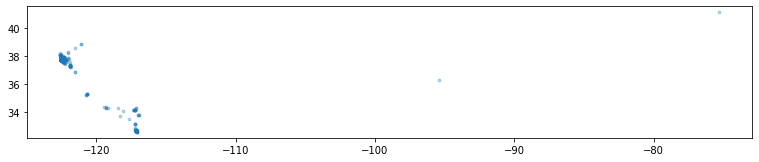

In [7]:
geo_X_df.plot(figsize=(13,10), marker="o", #mfc="red",
              markersize=8, #markeredgecolor="black",
              alpha=0.3)
plt.show()

In [8]:
nbrhoods = geopandas.read_file("../data/external/geo_export_cef81227-9d5f-4ba8-9646-6a4e0ac30e0d.shp")
nbrhoods.head()

,nhood,geometry
0,Bayview Hunters Point,"POLYGON ((-122.38158 37.75307, -122.38157 37.7..."
1,Bernal Heights,"POLYGON ((-122.40361 37.74934, -122.40378 37.7..."
2,Castro/Upper Market,"POLYGON ((-122.42656 37.76948, -122.42695 37.7..."
3,Chinatown,"POLYGON ((-122.40623 37.79756, -122.40551 37.7..."
4,Excelsior,"POLYGON ((-122.42398 37.73155, -122.42392 37.7..."


In [11]:
df_bus = pd.read_csv('../data/external/Active_Business_Locations.csv')
df_bus.head(10)

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,Location Start Date,Location End Date,Mail Address,Business Location
0,1003537-08-141,1002310,Rocket Games Inc,Rocket Games Inc,251 Rhode Island St 211,San Francisco,CA,94103.0,06/26/2013,NaN,06/26/2013,NaN,NaN,"251 RHODE ISLAND ST\nSAN FRANCISCO, CA 94103\n..."
1,1027106-04-151,1002310,Rocket Games Inc,Diamond Club Slots,360 3rd St 700,San Francisco,CA,94107.0,06/26/2013,NaN,04/29/2015,NaN,NaN,"360 3RD ST\nSAN FRANCISCO, CA 94107\n(37.78307..."
2,1027107-04-151,1002310,Rocket Games Inc,Easy Money Slots,360 3rd St 700,San Francisco,CA,94107.0,06/26/2013,NaN,04/29/2015,NaN,NaN,"360 3RD ST\nSAN FRANCISCO, CA 94107\n(37.78307..."
3,1027108-04-151,1002310,Rocket Games Inc,Lady Luck Slots,360 3rd St 700,San Francisco,CA,94107.0,06/26/2013,NaN,04/29/2015,NaN,NaN,"360 3RD ST\nSAN FRANCISCO, CA 94107\n(37.78307..."
4,1193440-06-181,1002310,Rocket Games Inc,Rocket Speed Inc,501 2nd St 211,San Francisco,CA,94107.0,06/26/2013,NaN,08/01/2016,NaN,NaN,NaN
5,1240100-12-191,1079507,Regina Jayubo,Regson,655 5th St Unit 8,San Francisco,CA,94107.0,05/01/2017,NaN,12/07/2019,NaN,655 5th St Apt 8,NaN
6,1240099-12-191,1085864,Lumen Sivitz,Lightwork,275 States St Unit A,San Francisco,CA,94114.0,04/03/2018,NaN,10/28/2019,NaN,34 Rausch St Apt 301,NaN
7,1240098-12-191,1107210,Christina Anguiano,Christina Anguiano,240 West Portal Ave,San Francisco,CA,94127.0,10/02/2019,NaN,12/01/2019,NaN,1638 Deems St,NaN
8,1240092-12-191,1109278,Michelle King,Posh Salon,2444 Fillmore St,San Fransisco,CA,94115.0,12/01/2019,NaN,12/01/2019,NaN,725 Glen Dr,NaN
9,1240097-12-191,1105221,Tcfi Home 1 Llc,Tcfi Home 1 Llc,156 Noe St,San Francisco,CA,94114.0,06/21/2019,NaN,12/03/2019,NaN,36 Divisadero St,NaN


In [12]:
# proportion of NaN values
df_bus.isna().sum() / df_bus.shape[0]

Location Id                0.000000
Business Account Number    0.000000
Ownership Name             0.000000
DBA Name                   0.000000
Street Address             0.000008
City                       0.000496
State                      0.002567
Source Zipcode             0.001480
Business Start Date        0.000000
Business End Date          1.000000
Location Start Date        0.000000
Location End Date          1.000000
Mail Address               0.000040
Business Location          0.437369
dtype: float64

In [13]:
df_bus.loc[121]

Location Id                                         0016366-01-001
Business Account Number                                      16366
Ownership Name                                      Latch Tile Inc
DBA Name                                            Latch Tile Inc
Street Address                                     1314 Donner Ave
City                                                 San Francisco
State                                                           CA
Source Zipcode                                               94124
Business Start Date                                     10/01/1968
Business End Date                                              NaN
Location Start Date                                     05/09/2000
Location End Date                                              NaN
Mail Address                                       1314 DONNER AVE
Business Location          1314 DONNER ST\nSan Francisco, CA 94124
Name: 121, dtype: object

In [14]:
X_bus = df_bus[df_bus['City'] == 'San Francisco'].dropna(subset=['Business Location'])
X_bus.drop(columns=['Business End Date', 'Location End Date'], inplace=True)
X_bus['latitude'] =  X_bus['Business Location'].apply(lambda x: (x[x.rfind('(')+1:x.rfind(' ')-1]))
X_bus['longitude'] =  X_bus['Business Location'].apply(lambda x: (x[x.rfind(' ')+1:x.rfind(')')-1]))
X_bus['latitude'] = pd.to_numeric(X_bus['latitude'], downcast='float', errors='coerce')
X_bus['longitude'] = pd.to_numeric(X_bus['longitude'], downcast='float', errors='coerce')
X_bus.dropna(subset=['latitude', 'longitude'], inplace=True)
X_bus = X_bus[(X_bus['longitude'] <= -121.) & (X_bus['latitude'] <= 37.84) & (X_bus['latitude'] >= 37.70)]
X_bus.head(10)

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Location Start Date,Mail Address,Business Location,latitude,longitude
0,1003537-08-141,1002310,Rocket Games Inc,Rocket Games Inc,251 Rhode Island St 211,San Francisco,CA,94103.0,06/26/2013,06/26/2013,NaN,"251 RHODE ISLAND ST\nSAN FRANCISCO, CA 94103\n...",37.766731,-122.402802
1,1027106-04-151,1002310,Rocket Games Inc,Diamond Club Slots,360 3rd St 700,San Francisco,CA,94107.0,06/26/2013,04/29/2015,NaN,"360 3RD ST\nSAN FRANCISCO, CA 94107\n(37.78307...",37.783077,-122.398041
2,1027107-04-151,1002310,Rocket Games Inc,Easy Money Slots,360 3rd St 700,San Francisco,CA,94107.0,06/26/2013,04/29/2015,NaN,"360 3RD ST\nSAN FRANCISCO, CA 94107\n(37.78307...",37.783077,-122.398041
3,1027108-04-151,1002310,Rocket Games Inc,Lady Luck Slots,360 3rd St 700,San Francisco,CA,94107.0,06/26/2013,04/29/2015,NaN,"360 3RD ST\nSAN FRANCISCO, CA 94107\n(37.78307...",37.783077,-122.398041
13,0371506-03-001,371506,Bayview Real Estate/mortgage,Bayview Real Estate/mortage,388 12th Ave,San Francisco,CA,94118.0,03/01/2014,03/01/2014,388-12th Ave.,"388 12TH AVE\nSan Francisco, CA 94118\n(37.781...",37.781033,-122.470734
14,0440448-01-001,440448,Primary Residential Mortgage,Primary Residential Mortgage,1746 18th St,San Francisco,CA,94107.0,07/17/2008,07/17/2008,1480 N 2200 W,"1746 18TH ST\nSAN FRANCISCO, CA 94107\n(37.762...",37.762390,-122.399773
18,1041647-10-151,1019443,Whirlpool Corporation,1751 Carroll Avenue,1751 Carroll Ave,San Francisco,CA,94124.0,08/26/2015,08/26/2015,2000 N M 63,"1751 CARROLL AVE\nSAN FRANCISCO, CA 94124\n(37...",37.725414,-122.394150
331,0000028-02-001,28,Ferrando Louise,3101 Laguna Apts,3101 Laguna St,San Francisco,CA,94123.0,09/30/1993,09/30/1993,2799 CALIFORNIA ST,"3101 LAGUNA ST\nSan Francisco, CA 94123\n(37.7...",37.799824,-122.430992
332,0000052-01-001,52,Ideal Novak Corp,Ideal Novak Corp,8 Mendosa Ave,San Francisco,CA,94116.0,10/01/1968,10/01/1968,8 MENDOSA AVE,"8 MENDOSA AVE\nSan Francisco, CA 94116\n(37.74...",37.748924,-122.465073
333,0000071-03-001,71,Tournahu George L,1840-42 Jefferson St,1840 Jefferson St #42,San Francisco,CA,94123.0,10/01/1968,10/07/1991,4444 GEARY BLVD STE 100,"1840 42 JEFFERSON ST\nSan Francisco, CA 94109\...",37.804760,-122.442787


In [15]:
gdf_bus = geopandas.GeoDataFrame(
    X_bus, geometry=geopandas.points_from_xy(X_bus.longitude, X_bus.latitude))
gdf_bus.head()

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Location Start Date,Mail Address,Business Location,latitude,longitude,geometry
0,1003537-08-141,1002310,Rocket Games Inc,Rocket Games Inc,251 Rhode Island St 211,San Francisco,CA,94103.0,06/26/2013,06/26/2013,NaN,"251 RHODE ISLAND ST\nSAN FRANCISCO, CA 94103\n...",37.766731,-122.402802,POINT (-122.40280 37.76673)
1,1027106-04-151,1002310,Rocket Games Inc,Diamond Club Slots,360 3rd St 700,San Francisco,CA,94107.0,06/26/2013,04/29/2015,NaN,"360 3RD ST\nSAN FRANCISCO, CA 94107\n(37.78307...",37.783077,-122.398041,POINT (-122.39804 37.78308)
2,1027107-04-151,1002310,Rocket Games Inc,Easy Money Slots,360 3rd St 700,San Francisco,CA,94107.0,06/26/2013,04/29/2015,NaN,"360 3RD ST\nSAN FRANCISCO, CA 94107\n(37.78307...",37.783077,-122.398041,POINT (-122.39804 37.78308)
3,1027108-04-151,1002310,Rocket Games Inc,Lady Luck Slots,360 3rd St 700,San Francisco,CA,94107.0,06/26/2013,04/29/2015,NaN,"360 3RD ST\nSAN FRANCISCO, CA 94107\n(37.78307...",37.783077,-122.398041,POINT (-122.39804 37.78308)
13,0371506-03-001,371506,Bayview Real Estate/mortgage,Bayview Real Estate/mortage,388 12th Ave,San Francisco,CA,94118.0,03/01/2014,03/01/2014,388-12th Ave.,"388 12TH AVE\nSan Francisco, CA 94118\n(37.781...",37.781033,-122.470734,POINT (-122.47073 37.78103)


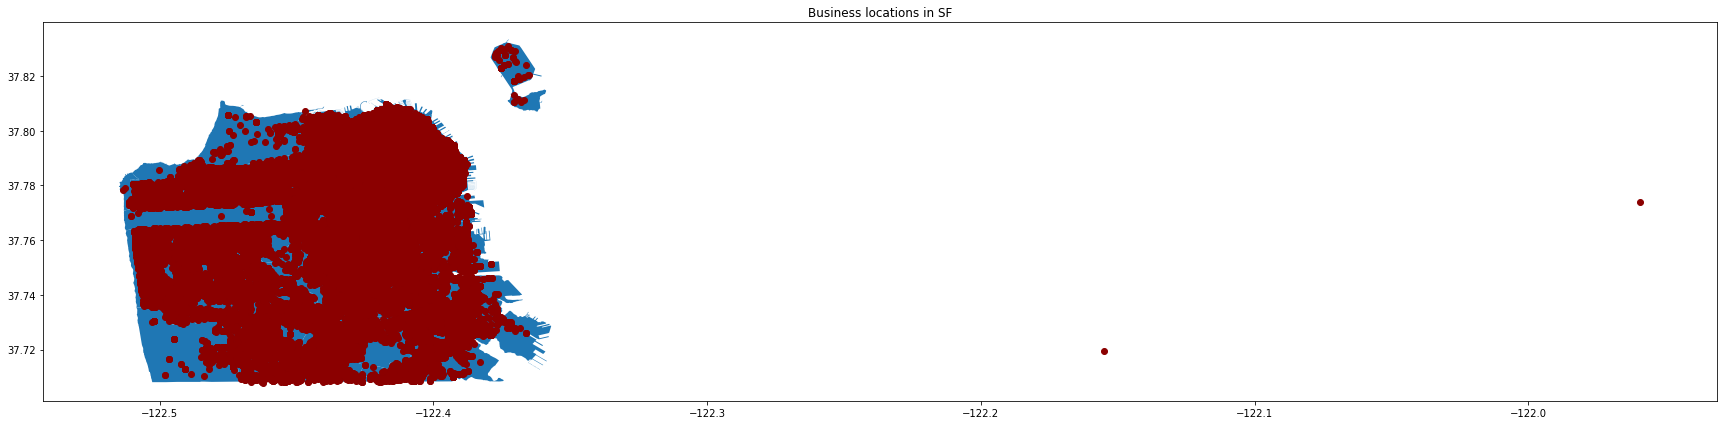

In [16]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = nbrhoods.plot(ax=ax)
# plotting business locations
gdf_bus.plot(ax=base, marker="o", color='darkred',
             #column='Source Zipcode', cmap='cool',
             )
#_ = ax.axis('off')
#plt.legend()
ax.set_title("Business locations in SF")
plt.show()

In [28]:
X_bus_counts = X_bus.groupby('Source Zipcode').agg({'latitude':'median', 'longitude':'median', 'Business Account Number':'count'})
X_bus_counts.reset_index(inplace=True)
gdf_bus_counts = geopandas.GeoDataFrame(
    X_bus_counts, geometry=geopandas.points_from_xy(X_bus_counts.longitude, X_bus_counts.latitude))
gdf_bus_counts.head()

,Source Zipcode,latitude,longitude,Business Account Number,geometry
0,94010.0,37.800217,-122.411049,1,POINT (-122.41105 37.80022)
1,94012.0,37.776482,-122.422371,2,POINT (-122.42237 37.77648)
2,94013.0,37.775532,-122.408302,3,POINT (-122.40830 37.77553)
3,94014.0,37.792076,-122.402313,2,POINT (-122.40231 37.79208)
4,94015.0,37.783684,-122.446381,2,POINT (-122.44638 37.78368)


In [29]:
type(gdf_bus_counts.geometry)

geopandas.geoseries.GeoSeries

No handles with labels found to put in legend.


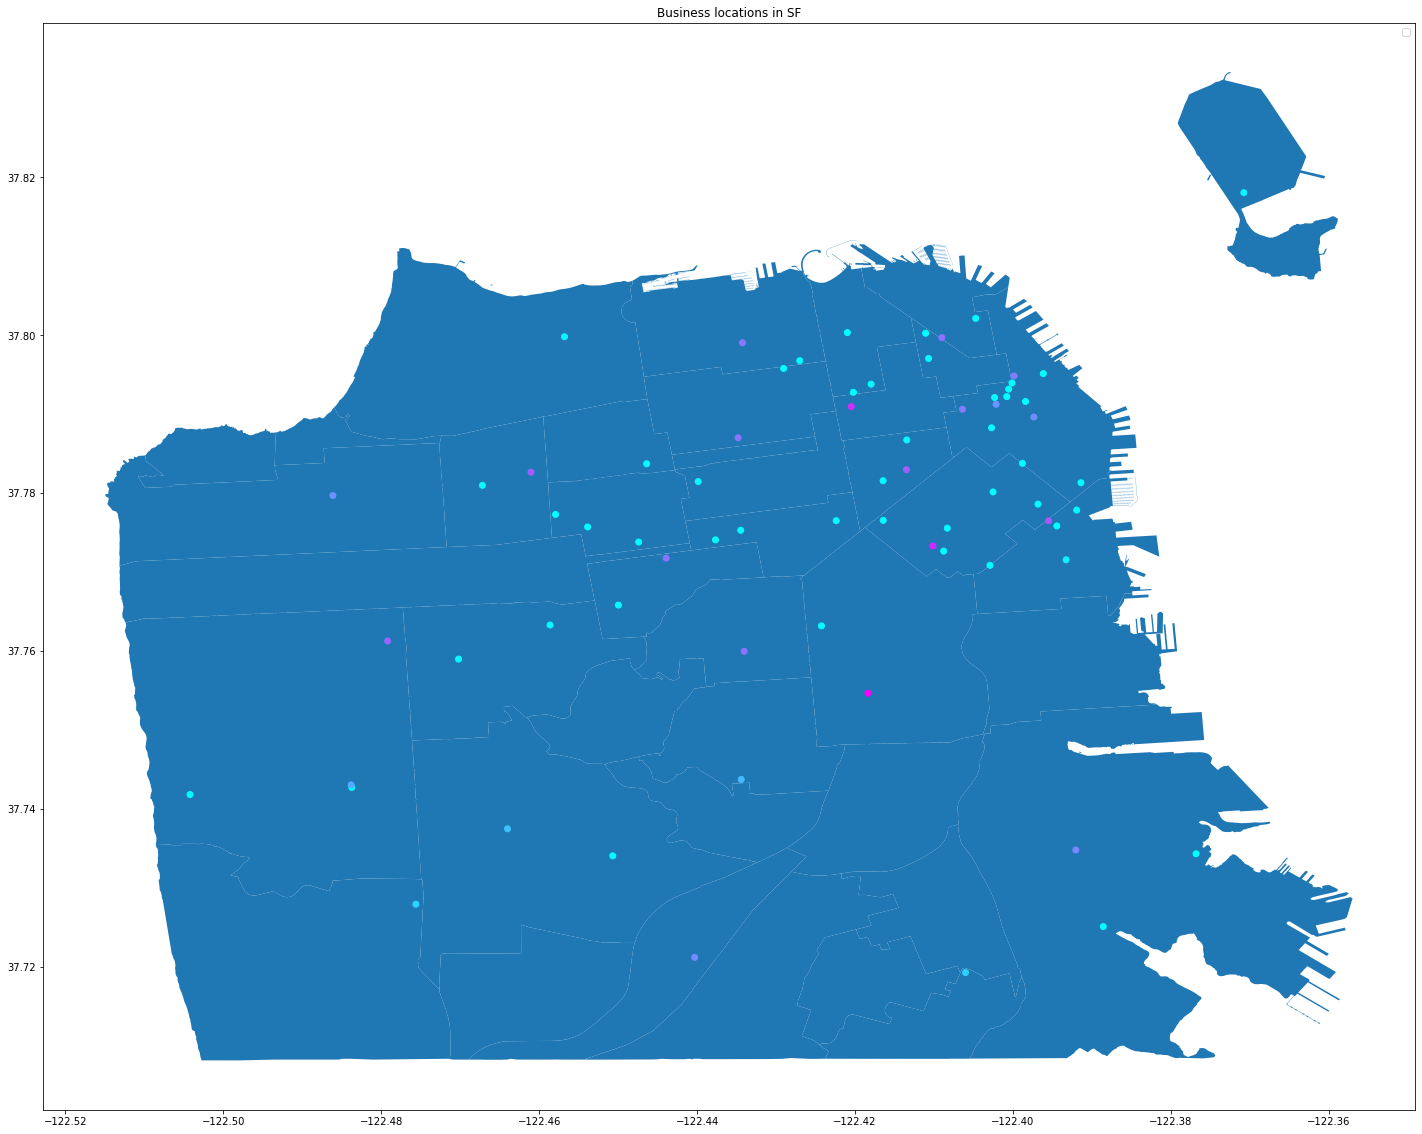

In [32]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = nbrhoods.plot(ax=ax)
# plotting business locations
gdf_bus_counts.plot(ax=base, marker="o", #color='darkred',
             column='Business Account Number', cmap='cool',
             )
#_ = ax.axis('off')
plt.legend()
ax.set_title("Business locations in SF")
plt.show()

## Schools

In [ ]:
df_sch = pd.read_csv('../data/external/Map_of_schools.csv')
df_sch.head()

In [ ]:
# proportion of NaN values
df_business.isna().sum() / df_business.shape[0]